# Introduction to PyTorch

Katarina Slama, sarajkslama@gmail.com

Adapted from Yannet Interian, https://github.com/yanneta

PyTorch consists of 4 main modules:
* `torch`: a general purpose array library similar to Numpy that can do computations on GPU
* `torch.autograd`: a package for automatically obtaining gradients
* `torch.nn`: a neural net library with common layers and cost functions
* `torch.optim`: an optimization package with common optimization algorithms like SGD, Adam, etc

## import packages

In [193]:
import matplotlib.pyplot as plt
%matplotlib inline

In [194]:
import torch
import torch.autograd as autograd
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np

## pytorch tensors

### create a tensor

In [341]:
x = torch.randn(4,6)

In [342]:
x.type()

'torch.FloatTensor'

In [343]:
x

tensor([[ 1.2064,  0.1164,  0.9206,  0.8671, -0.8045,  0.5863],
        [-0.1958, -0.3385,  0.0390, -1.0222,  0.7580, -0.1422],
        [ 1.4626,  1.5422,  0.5809,  0.0417,  0.6074,  0.3618],
        [ 0.6536,  1.9160, -0.2270,  0.7834,  1.2723, -0.6658]])

In [201]:
x.shape

torch.Size([5, 10])

In [203]:
x.size()

torch.Size([5, 10])

### use `.reshape()` to reshape the tensor

In [344]:
y = x.reshape(1, -1)

In [345]:
y.size()

torch.Size([1, 24])

In [346]:
x.size()

torch.Size([4, 6])

### equivalent operations in numpy

In [347]:
x_np = np.random.randn(5,10)

In [348]:
x_np.shape

(5, 10)

In [349]:
y_np = x_np.reshape(1, -1)

In [350]:
y_np.shape

(1, 50)

In [351]:
y_np.size

50

In [352]:
x_np.shape

(5, 10)

In [353]:
x_np.size

50

## pytorch autograd

The `autograd` package in PyTorch provides classes and functions implementing automatic differentiation of functions. For example, it can compute the gradient of the error with respect to all parameters.

PyTorch will store the gradients of the parameters with the parameters themselves.
Therefore, when you declare a parameter (with respect to which you will later compute the gradient),
you need to declare those parameters as tensors with the `requires_grad=True` keyword.

### an example with one parameter

In [427]:
x = torch.tensor([1., 2., 3., 4., 5., 6.],
                requires_grad=True)

In [428]:
x

tensor([1., 2., 3., 4., 5., 6.], requires_grad=True)

In [429]:
x.shape

torch.Size([6])

The gradient of the error with respect to x will live in x.grad. Before you've computed the gradient, x.grad is empty.

In [430]:
print(x.grad)

None


In [431]:
our_error_function = 2*x**2+1

In [432]:
our_error_function

tensor([ 3.,  9., 19., 33., 51., 73.], grad_fn=<AddBackward0>)

In [433]:
L = our_error_function.sum()

In [434]:
L

tensor(188., grad_fn=<SumBackward0>)

In [435]:
L.backward()

In [436]:
x.grad

tensor([ 4.,  8., 12., 16., 20., 24.])

### an example with two parameters

In [228]:
x1 = torch.tensor([3.], 
                  requires_grad=True)

In [229]:
x2 = torch.tensor([2.], 
                  requires_grad=True)

In [230]:
y = x1**2 + x2**3

In [232]:
y

tensor([17.], grad_fn=<AddBackward0>)

In [235]:
print(x1.grad) 
print(x2.grad)

None
None


In [237]:
y.backward()

In [238]:
x1.grad

tensor([6.])

In [35]:
x2.grad

tensor([12.])

## torch.nn

The simplest neural network is a linear transformation. We multiply our data by some weights, and add a bias.

`nn.Linear` will create a 3x5 matrix, i.e., a transformation from dimension 5 to dimension 3

Give it the `in_features` (5) first, and the `out_features` (3) second.

In [239]:
linear_map = nn.Linear(5,3)

It also creates a bias, of the same dimension as the `out_features`

In [240]:
linear_map

Linear(in_features=5, out_features=3, bias=True)

The matrix and the bias are both parameters of the linear map, and we can look at them like this:

In [241]:
[param for param in linear_map.parameters()]

[Parameter containing:
 tensor([[ 0.2850, -0.3640, -0.1715, -0.3142,  0.4420],
         [-0.2885, -0.0332,  0.0051, -0.0155,  0.0843],
         [ 0.1113,  0.2387, -0.0462, -0.4320, -0.0082]], requires_grad=True),
 Parameter containing:
 tensor([ 0.4121, -0.4172, -0.1413], requires_grad=True)]

We can check out their shapes.

In [243]:
[param.shape for param in linear_map.parameters()]

[torch.Size([3, 5]), torch.Size([3])]

The matrix alone lives in `weight`...

In [244]:
linear_map.weight

Parameter containing:
tensor([[ 0.2850, -0.3640, -0.1715, -0.3142,  0.4420],
        [-0.2885, -0.0332,  0.0051, -0.0155,  0.0843],
        [ 0.1113,  0.2387, -0.0462, -0.4320, -0.0082]], requires_grad=True)

...and the bias lives in `bias`

In [327]:
linear_map.bias

Parameter containing:
tensor([ 0.4121, -0.4172, -0.1413], requires_grad=True)

Now let's create a matrix with some random data, to demonstrate how we can use the linear map that we created with `nn.Linear()`

In [246]:
X = torch.randn(10,5)

In [247]:
X

tensor([[ 0.9801,  1.1125, -1.2095,  0.4182, -0.3130],
        [ 1.6291, -0.1701,  0.0787,  0.2263,  0.6987],
        [ 1.0017, -0.8891, -1.3169,  0.6132,  0.7245],
        [-0.5036,  1.0168, -0.5922, -1.8033,  0.3284],
        [ 0.7292, -1.4636, -0.4481, -0.1626, -0.8441],
        [-1.3210, -0.1174, -2.2700,  2.5133,  1.3006],
        [ 0.0420,  1.7811, -1.0846,  0.5719,  0.3084],
        [ 0.4064, -1.6707, -0.6361, -0.0244,  0.0591],
        [ 1.0137,  0.5018,  0.8838, -0.0297, -0.0256],
        [-1.0987, -2.1562, -0.2887, -0.1696, -1.7747]])

Calling `forward` applies `linear_map` to X

In [248]:
linear_map.forward(X)

tensor([[ 0.2242, -0.7758,  0.1111],
        [ 1.1625, -0.8258, -0.1077],
        [ 1.3746, -0.6318, -0.4521],
        [ 0.7118, -0.2529,  0.8490],
        [ 0.9076, -0.6499, -0.3117],
        [ 0.2528,  0.0270, -1.3079],
        [-0.0817, -0.4767,  0.0890],
        [ 1.2790, -0.4769, -0.4554],
        [ 0.3648, -0.7235,  0.0635],
        [ 0.2024, -0.1770, -0.6771]], grad_fn=<AddmmBackward>)

As you can see, we get a 10x3 matrix out (crushing the dimension, 5, in the middle). 

In [249]:
linear_map.forward(X).shape

torch.Size([10, 3])

We can also omit the keyword `forward`, and get the same operation.

In [250]:
linear_map(X)

tensor([[ 0.2242, -0.7758,  0.1111],
        [ 1.1625, -0.8258, -0.1077],
        [ 1.3746, -0.6318, -0.4521],
        [ 0.7118, -0.2529,  0.8490],
        [ 0.9076, -0.6499, -0.3117],
        [ 0.2528,  0.0270, -1.3079],
        [-0.0817, -0.4767,  0.0890],
        [ 1.2790, -0.4769, -0.4554],
        [ 0.3648, -0.7235,  0.0635],
        [ 0.2024, -0.1770, -0.6771]], grad_fn=<AddmmBackward>)

We can compute the same thing 'manually'.

In [251]:
torch.matmul(X, linear_map.weight.T) + linear_map.bias

tensor([[ 0.2242, -0.7758,  0.1111],
        [ 1.1625, -0.8258, -0.1077],
        [ 1.3746, -0.6318, -0.4521],
        [ 0.7118, -0.2529,  0.8490],
        [ 0.9076, -0.6499, -0.3117],
        [ 0.2528,  0.0270, -1.3079],
        [-0.0817, -0.4767,  0.0890],
        [ 1.2790, -0.4769, -0.4554],
        [ 0.3648, -0.7235,  0.0635],
        [ 0.2024, -0.1770, -0.6771]], grad_fn=<AddBackward0>)

## linear regression

First, let's generate some fake data that is approximately linear.

In [252]:
# A function to compute a linear function of some data
def lin(slope, intercept, x):
    return slope*x+intercept

In [253]:
# A function to create a linear function of some data, and add some noise, to make it realistic.
def gen_fake_data(num_points, slope, intercept):
    x = np.random.uniform(0, 1, num_points)
    y = lin(slope, intercept, x) + np.random.normal(0, 0.3,num_points)
    return x, y

In [254]:
num_points = 50
slope = 3
intercept = 8

In [255]:
x, y = gen_fake_data(num_points, slope, intercept)

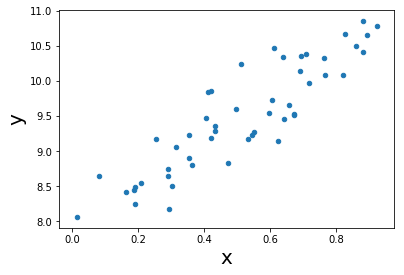

In [261]:
plt.scatter(x, y, s=20);
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
pass

In this case, we know the 'true function' underlying the data

In [257]:
ground_truth = lin(slope, intercept, x)

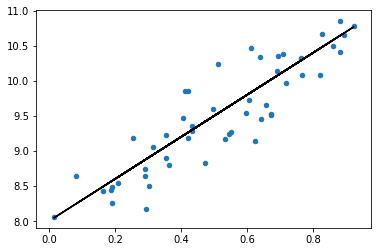

In [258]:
plt.scatter(x, y, s=20);
plt.plot(x, ground_truth,
        color='k')
pass

Now, let's assume we don't know the ground truth, but we want to estimate it using our data.

We can do this using linear regression.

First, we define a loss function: It gives us a way to quantify, for any guesses at what y might be with respect to x, how "badly" we are doing...

We will use mean square error as our loss function.

In [259]:
def mse(y_hat, y):
    return ((y_hat - y)**2).mean()

## Pause to think: What do you think the below line will output?

In [262]:
mse(np.array([2,2]),
            np.array([2,4]))

2.0

So we have a loss function. Now, let's see how we can use it.

Let's take a guess at the slope and the intercept. Suppose we think the slope is 10, and the intercept is 5.

In [263]:
slope_guess = 10
intercept_guess = 5

In [264]:
y_hat = slope_guess*x + intercept_guess

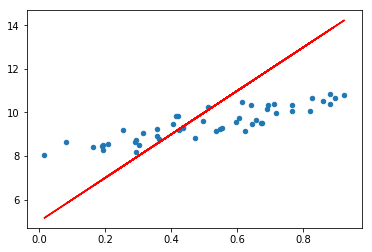

In [265]:
plt.scatter(x, y, s=20);
plt.plot(x, y_hat,
        color='r')
pass

In [266]:
mse(y_hat, y)

3.2410291767329578

In [267]:
mse(ground_truth, y)

0.12013831275531014

We can bring mse into a single loss function that takes our estimated slope and intercept as an argument

In [268]:
def mse_loss(slope_guess, intercept_guess, data, y):
    return mse(lin(slope_guess, intercept_guess, data), y)

In [270]:
mse_loss(101, 5, x, y)

2762.6899856226078

In [271]:
mse_loss(2, 10, x, y)

2.5494320853179433

In [272]:
mse_loss(slope, intercept, x, y)

0.12013831275531014

## recap so far

- model: linear regression
- evaluation criterion (loss function): MSE

## how can we use our loss function to make our model better?

## optimization: gradient descent

Gradient descent is a method for minimizing functions. We want to minimize the mse_loss function. 

Let's generate some more fake data with the same slope (3) and intercept (8).

In [273]:
x, y = gen_fake_data(10000, 3., 8.)

In [274]:
x.shape, y.shape

((10000,), (10000,))

In [275]:
type(x), type(y)

(numpy.ndarray, numpy.ndarray)

we need to convert the data and y-values to pytorch tensors

In [276]:
x = torch.tensor(x)
y = torch.tensor(y)

In [277]:
x.shape

torch.Size([10000])

In [278]:
y.shape

torch.Size([10000])

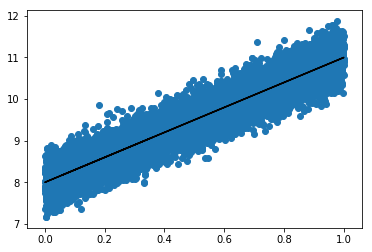

In [279]:
plt.scatter(x,y)
plt.plot(x, lin(slope, intercept, x),
        color='k')
pass

To start our optimization procedure, we begin by taking a random guess at what the slope and intercept might be.

In [280]:
slope_estimate, intercept_estimate = np.random.randn(1), np.random.randn(1)

In [281]:
slope_estimate, intercept_estimate

(array([-0.2020806]), array([0.49064326]))

Set requires_grad=True to enable you to the compute gradient with respect to the slope and the intercept.

In [282]:
slope_estimate = torch.tensor(slope_estimate, requires_grad=True)
intercept_estimate = torch.tensor(intercept_estimate, requires_grad=True)

In [283]:
slope_estimate

tensor([-0.2021], dtype=torch.float64, requires_grad=True)

In [284]:
intercept_estimate

tensor([0.4906], dtype=torch.float64, requires_grad=True)

## Pause to think: What do you think the below line will output?

In [285]:
print(slope_estimate.grad)

None


## compute gradient descent

First, we set a learning rate (to be some small number): This defines how large our steps will be as we descend the gradient. :-)

In [137]:
# set learning rate (some small number)
learning_rate = 1e-3

In [286]:
# do 10000 iterations
for t in range(10000):
    # forward pass: compute predicted y, and loss for y
    loss = mse_loss(slope_estimate, intercept_estimate, x, y)
        
    # now, compute the gradient, using the .backward keyword
    loss.backward()
    
    # print the loss at every 1000th iteration, to see how it (hopefully) descends
    if t%1000==0:
        print()
        print('slope gradient: ', np.round(slope_estimate.grad.item(),5))
        print('intercept gradient: ', np.round(intercept_estimate.grad.item(),5))
        print('loss: ', np.round(loss.item(),5))
    
    # now, update your parameters, slope_estimate and intercept_estimate using gradient descent; 
    # subtract the gradient for the slope estimate multiplied by the learning rate from the slope estimate, to get a new,
    # better slope estimate
    # the .data means that we actually get a value that we can use
    # .grad alone is a variable.
    slope_estimate.data -= learning_rate*slope_estimate.grad.data
    intercept_estimate.data -= learning_rate*intercept_estimate.grad.data
    
    # zero the gradients to avoid accumulating them. (as a default, pytorch adds these up)
    slope_estimate.grad.data.zero_()
    intercept_estimate.grad.data.zero_()


slope gradient:  -9.61978
intercept gradient:  -18.2186
loss:  83.91765

slope gradient:  -0.69681
intercept gradient:  -1.47736
loss:  0.64261

slope gradient:  0.00186
intercept gradient:  -0.14743
loss:  0.1147

slope gradient:  0.05022
intercept gradient:  -0.0384
loss:  0.10698

slope gradient:  0.04794
intercept gradient:  -0.02651
loss:  0.10353

slope gradient:  0.0424
intercept gradient:  -0.0227
loss:  0.10089

slope gradient:  0.03725
intercept gradient:  -0.01989
loss:  0.09885

slope gradient:  0.03271
intercept gradient:  -0.01746
loss:  0.09728

slope gradient:  0.02872
intercept gradient:  -0.01533
loss:  0.09607

slope gradient:  0.02521
intercept gradient:  -0.01346
loss:  0.09513


In [287]:
loss

tensor(0.0944, dtype=torch.float64, grad_fn=<MeanBackward0>)

In [288]:
print(np.round(slope_estimate.item(),2), np.round(intercept_estimate.item(),2))

3.17 7.91


In [289]:
slope, intercept

(3, 8)

In [290]:
mse_loss(3, 8, x, y)

tensor(0.0920, dtype=torch.float64)

## let pytorch do more of the work for us: simplified gradient descent loop

Instead of initializing our slope_estimate and intercept_estimate, we can use nn.Linear to give us just one weight, the slope, and one bias, the intercept.

In [291]:
nn.Linear(1, 1)

Linear(in_features=1, out_features=1, bias=True)

In [292]:
model_simple = nn.Linear(1,1)

Here, we have just two parameters.

In [293]:
[item for item in model_simple.parameters()]

[Parameter containing:
 tensor([[-0.0324]], requires_grad=True), Parameter containing:
 tensor([-0.4537], requires_grad=True)]

In [294]:
model_simple.weight

Parameter containing:
tensor([[-0.0324]], requires_grad=True)

In [295]:
model_simple.bias

Parameter containing:
tensor([-0.4537], requires_grad=True)

## generate some more fake data

In [305]:
x, y = gen_fake_data(10000, 3., 8.)
x = torch.tensor(x).float()
y = torch.tensor(y).float()
x.shape, y.shape

(torch.Size([10000]), torch.Size([10000]))

We need to add a dimension to x, to make it work.

In [308]:
x1 = x.reshape(-1, 1)

In [309]:
x1.shape

torch.Size([10000, 1])

In [310]:
y_hat = model_simple(x1)

In [311]:
y_hat.shape

torch.Size([10000, 1])

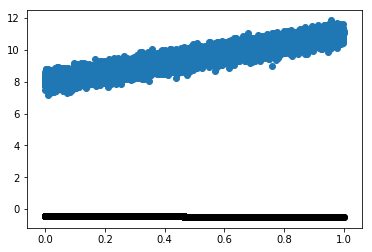

In [313]:
plt.scatter(x,y)
# xvals = np.linspace(0,max(x), 5)
plt.scatter(x, y_hat.detach().numpy(),
        color='k')
pass

In [314]:
# use the optim package to define an optimizer that will update the weights of the model.

In [315]:
learning_rate = 0.1 

In [317]:
optimizer = torch.optim.SGD(model_simple.parameters(),
                            lr = learning_rate)

In [318]:
for t in range(100):
    # Forward pass: compute predicted y
    y_hat = model_simple(x1)
    loss = F.mse_loss(y_hat, y.reshape(-1,1))
    if t % 10 == 0:
        print(loss.item())
        
    # Before the backward pass, use the optimizer object to zero all of the gradients for the variables
    optimizer.zero_grad()
    loss.backward() # compute the gradients
    
    # call step function to actually update the parameters
    optimizer.step()

100.6314697265625
0.4631584882736206
0.15940119326114655
0.14208756387233734
0.12939076125621796
0.11963450163602829
0.11213653534650803
0.1063740998506546
0.10194550454616547
0.09854196757078171


In [320]:
print([p for p in model_simple.parameters()])

[Parameter containing:
tensor([[3.3108]], requires_grad=True), Parameter containing:
tensor([7.8385], requires_grad=True)]


In [325]:
model_simple

Linear(in_features=1, out_features=1, bias=True)

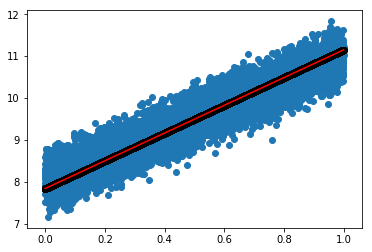

In [326]:
plt.scatter(x,y)
# xvals = np.linspace(0,max(x), 5)
plt.scatter(x, y_hat.detach().numpy(),
        color='k')
xvals = np.linspace(0,max(x), 5)
plt.plot(xvals, (model_simple.weight.detach().numpy()*xvals + model_simple.bias.detach().numpy())[0],
        color='r')
pass

## postlude: you can also stack models using pytorch

In [437]:
model_seq = nn.Sequential(model_simple, model_simple)

In [439]:
model_seq

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Linear(in_features=1, out_features=1, bias=True)
)

In [440]:
model_simple.weight, model_simple.bias

(Parameter containing:
 tensor([[3.3108]], requires_grad=True), Parameter containing:
 tensor([7.8385], requires_grad=True))

Say that we want to apply our model_simple to the x-value, 5.

In [441]:
model_simple.weight.data*5 + model_simple.bias.data

tensor([[24.3925]])

In [442]:
model_simple.forward(torch.tensor([5.]))

tensor([24.3925], grad_fn=<AddBackward0>)

In [443]:
model_simple(torch.tensor([5.]))

tensor([24.3925], grad_fn=<AddBackward0>)

What if we do it twice?

In [444]:
model_simple.forward(model_simple.forward(torch.tensor([5.])))

tensor([88.5968], grad_fn=<AddBackward0>)

Or simply, like so:

In [445]:
model_seq.forward(torch.tensor([5.]))

tensor([88.5968], grad_fn=<AddBackward0>)